<a href="https://colab.research.google.com/github/Michell-Michell/Integracion_de_datos_y_prospectivas/blob/main/Reto_1_Michell_Giraldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cargo los Datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #Para gráfico de distribuciones

from google.colab import drive #Conexión automática como el Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para evitar que los códigos se confundan entre si, decidí cambiar los nombres de las variables por cada año. En el año 1 le puse al final de la variable la letra a, y del año 2 al año 4 le puse su número respectivo.

#Año 1

In [ ]:
nxl='/content/drive/MyDrive/Integración de Datos/1. SolicitantesCrédito(USD)_Años.xlsx'
XDBa=pd.read_excel(nxl,sheet_name=5)
display(XDBa)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,6436,54,Mujer,Separado,0,1,1,3,Técnico,Indefinido,...,18,87.483415,Buenas Referencias,Codeudor,Sin Patrimonio,Mora mayor a 60 Dìas,1,0.024565,623.369751,0.457573
1,6437,28,Hombre,Casado,1,0,0,3,Tecnólogo,Ninguno,...,60,6.849567,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.113544,491.716217,0.528300
2,6438,27,NR,Soltero,1,1,1,2,Primaria,Indefinido,...,48,5.907680,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.140295,416.151337,0.116118
3,6439,43,Mujer,Soltero,3,3,3,2,Técnico,Ninguno,...,36,8.664364,Buena Experiencia CFB,Libranza Establecida,Prop.sin Hipoteca,Sin experiencia,0,0.289542,381.160431,0.606498
4,6440,49,Mujer,Soltero,0,1,1,2,Bachiller,Ninguno,...,3,167.064101,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.135805,378.608978,0.046469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,8372,48,Hombre,Separado,0,0,0,3,Tecnólogo,Fijo,...,36,27.043503,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.056132,550.980408,0.122566
1338,8374,31,Hombre,Soltero,2,0,0,5,Bachiller,Indefinido,...,48,25.579568,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.035120,659.471375,0.321453
1339,8375,38,Hombre,Separado,0,0,0,3,Bachiller,Labor Contratada,...,36,21.508792,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.101976,465.011536,0.017814
1340,8376,43,Mujer,Casado,1,2,2,2,Tecnólogo,Ninguno,...,36,11.047468,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.156707,423.237305,0.265477


In [ ]:
#Se cálcula la distribución LDA
LDAa=XDBa.iloc[:,25]*XDBa.iloc[:,33]*(1+XDBa.iloc[:,35])
XDBa['LDA']=LDAa

In [ ]:
NCa=10 #número de clusters

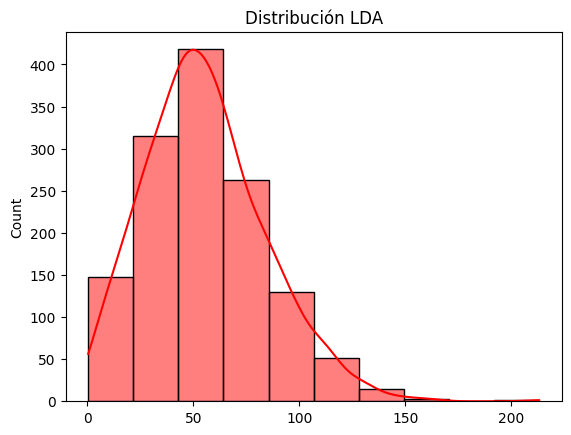

,LI,LS,ND,Columnas
0,0.413092,21.695260,11.054176,147.0
1,21.695260,42.977428,32.336344,315.0
2,42.977428,64.259597,53.618513,418.0
3,64.259597,85.541765,74.900681,263.0
4,85.541765,106.823933,96.182849,130.0
5,106.823933,128.106101,117.465017,51.0
6,128.106101,149.388270,138.747186,14.0
7,149.388270,170.670438,160.029354,3.0
8,170.670438,191.952606,181.311522,0.0
9,191.952606,213.234775,202.593690,1.0


In [ ]:
plt.figure()
sns.histplot(LDAa,kde=True,bins=NCa,color='red')
plt.title('Distribución LDA')
plt.show()

#Obtenemos la información de la Distribución
counts, bin_edges=np.histogram(LDAa,bins=NCa)
LIa=bin_edges[:-1];LSa=bin_edges[1:]
mca=(LIa+LSa)/2 #El valor representativo de cada intervalo

#se crea la tabla de caracterización
TAsq=np.column_stack((LIa,LSa,mca,counts))
dfa=pd.DataFrame(TAsq,columns=['LI','LS','ND','Columnas']) #ND= Número de datos
display(dfa)

In [ ]:
u=np.sum(mca*counts)/np.sum(counts) #valor esperado
print("La media de los datos es:",u)

La media de los datos es: 55.91800167999396


In [ ]:
varianzaa=np.sum(counts*(mca-u)**2)/np.sum(counts)
print("La varianza de los datos es:",varianzaa) #Si tengo más intervalos es más preciso!

La varianza de los datos es: 836.1104127631511


In [ ]:
desviaciona=np.sqrt(varianzaa)
print("La desviación de los datos es:",desviaciona)

La desviación de los datos es: 28.91557387919443


In [ ]:
#Quiero identificar datos raros o outliers
LIea=u-2*desviaciona;LSea=u+2*desviaciona
filas_out=np.where((LDAa<LIea) | (LDAa>LSea))[0]
LDAa.iloc[filas_out,]

,0
16,213.234775
26,129.116136
46,149.960041
81,125.376090
85,130.683381
138,122.125270
190,115.696687
231,117.439366
246,116.678268
292,118.407333


In [ ]:
from scipy.stats import skew, kurtosis
print("El coeficiente de Asimetría colab es", skew(LDAa))
print("El coeficiente de Curtosis colab es", kurtosis(LDAa))

El coeficiente de Asimetría colab es 0.6074481010737891
El coeficiente de Curtosis colab es 0.6938886954460353


In [ ]:
#Coeficiente de Asimetría
cas=np.sum(counts*(mca-u)**3)/(np.sum(counts)*desviaciona**3)
print("El coeficiente de asimetría es:",cas)
vcas=(skew(LDAa)-cas)/skew(LDAa)
print("La variación del coeficiente de asimetría es:",vcas*100)

El coeficiente de asimetría es: 0.5936899030624093
La variación del coeficiente de asimetría es: 2.2649174451380043


In [ ]:
#Coeficiente de Curtosis
curt = np.sum(counts*(mca-u)**4)/(np.sum(counts)*desviaciona**4)-3
print ("El coeficiente de curtosis es:",curt)

El coeficiente de curtosis es: 0.49072605058951346


In [ ]:
PE = len(np.where(LDAa<u)[0])
print("Las pérdidas esperadas son:", PE)
OpVar = np.percentile(LDAa, 99.9)
print("El costo de aseguramiento de cada crédito es", OpVar)
PC = len(np.where(LDAa>OpVar)[0])
print("Las pérdidas catastróficas son:", PC)
PNE = len(np.where((LDAa>=u)&(LDAa<=OpVar))[0])
print("Las pérdidas no esperadas son:", PNE)

Las pérdidas esperadas son: 729
El costo de aseguramiento de cada crédito es 161.29129989014118
Las pérdidas catastróficas son: 2
Las pérdidas no esperadas son: 611


#Análisis
Del código anterior se puede observar que la libreria google.colab nos permite subir los datos automaticamente de acuerdo con la base de datos, se puede observar un total de 1342 datos. De las medidas de tendencia central se observa que la media de las pérdidas se ubicó 55.918 dolares por crédito, mientras que la desviación de los datos se ubicó en promedio de los 28 dolares. Es importante mencionar que el coeficiente de asimetría se ubicó por encima de cero, lo que indica que la distribución tiende a ser de cola larga, con una curtosis positiva, lo que indica que los datos se concentran en valores bajos o medios, con algunos valores altos que generan la cola derecha, y existe una ligera tendencia a tener outliers.

#Año 2

In [ ]:
nxl='/content/drive/MyDrive/Integración de Datos/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB2=pd.read_excel(nxl,sheet_name=4)
display(XDB2)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,4285,52,Hombre,Casado,0,0,0,3,Tecnólogo,Indefinido,...,24,5.966434,Buenas Referencias,Hipoteca,Prop.sin Hipoteca,Mora mayor a 60 Dìas,0,0.253213,358.859253,0.109183
1,4286,31,Hombre,Casado,3,1,1,2,Bachiller,Ninguno,...,3,82.453584,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.212950,296.161011,0.004476
2,4288,29,NR,Soltero,0,0,0,3,Tecnólogo,Fijo,...,24,22.023156,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Màximo 3 moras 30 Dìas,1,0.105714,406.482330,0.120763
3,4292,38,Mujer,Casado,0,0,0,2,Técnico,Ninguno,...,36,3.179137,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.292361,312.640320,0.162121
4,4294,32,NR,Soltero,1,0,0,3,Bachiller,Fijo,...,36,17.509553,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,0,0.082367,472.922882,0.210041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6431,41,NR,Casado,3,3,3,2,Primaria,Ninguno,...,36,3.565784,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.310774,363.216125,0.170423
1496,6432,43,Hombre,Viudo,1,1,1,5,Técnico,Fijo,...,24,21.137539,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.129138,489.444824,0.394218
1497,6433,49,NR,Casado,0,2,2,2,Tecnólogo,Ninguno,...,36,27.632010,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081944,505.672943,0.196060
1498,6434,65,NR,Soltero,3,0,0,2,Bachiller,Indefinido,...,48,14.354478,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.084422,568.723694,0.318254


In [ ]:
#Se cálcula la distribución LDA
LDA2=XDB2.iloc[:,25]*XDB2.iloc[:,33]*(1+XDB2.iloc[:,35])
XDB2['LDA']=LDA2

In [ ]:
NC2=10 #número de clusters

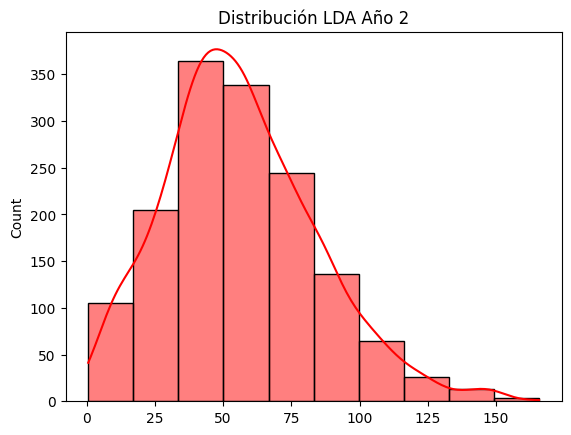

,LI,LS,ND,Columnas
0,0.568346,17.091246,8.829796,105.0
1,17.091246,33.614145,25.352695,205.0
2,33.614145,50.137045,41.875595,364.0
3,50.137045,66.659945,58.398495,338.0
4,66.659945,83.182844,74.921395,244.0
5,83.182844,99.705744,91.444294,136.0
6,99.705744,116.228644,107.967194,65.0
7,116.228644,132.751544,124.490094,26.0
8,132.751544,149.274443,141.012993,13.0
9,149.274443,165.797343,157.535893,4.0


In [ ]:
plt.figure()
sns.histplot(LDA2,kde=True,bins=NC2,color='red')
plt.title('Distribución LDA Año 2')
plt.show()

#Obtenemos la información de la Distribución
counts2, bin_edges2=np.histogram(LDA2,bins=NC2)
LI2=bin_edges2[:-1];LS2=bin_edges2[1:]
mc2=(LI2+LS2)/2 #El valor representativo de cada intervalo

#se crea la tabla de caracterización
TAsq2=np.column_stack((LI2,LS2,mc2,counts2))
df2=pd.DataFrame(TAsq2,columns=['LI','LS','ND','Columnas']) #ND= Número de datos
display(df2)

In [ ]:
u2=np.sum(mc2*counts2)/np.sum(counts2) #valor esperado
print("La media de los datos para el Año 2 es:",u2)

La media de los datos para el Año 2 es: 56.36067049807551


In [ ]:
varianza2=np.sum(counts2*(mc2-u2)**2)/np.sum(counts2)
print("La varianza de los datos para el Año 2 es:",varianza2) #Si tengo más intervalos es más preciso!

La varianza de los datos para el Año 2 es: 794.299449263555


In [ ]:
desviacion2=np.sqrt(varianza2)
print("La desviación de los datos para el Año 2 es:",desviacion2)

La desviación de los datos para el Año 2 es: 28.18331863467386


In [ ]:
#Quiero identificar datos raros o outliers para el Año 2
LIe2=u2-2*desviacion2;LSe2=u2+2*desviacion2
filas_out2=np.where((LDA2<LIe2) | (LDA2>LSe2))[0]
LDA2.iloc[filas_out2,]

,0
35,116.745096
102,113.432472
122,133.420500
143,116.498204
201,115.792749
254,136.810783
286,149.479578
287,124.199257
398,113.366506
404,117.077681


In [ ]:
from scipy.stats import skew, kurtosis
print("El coeficiente de Asimetría colab para el Año 2 es", skew(LDA2))
print("El coeficiente de Curtosis colab para el Año 2 es", kurtosis(LDA2))

El coeficiente de Asimetría colab para el Año 2 es 0.5654219317544418
El coeficiente de Curtosis colab para el Año 2 es 0.3749822454394929


In [ ]:
#Coeficiente de Asimetría para el Año 2
cas2=np.sum(counts2*(mc2-u2)**3)/(np.sum(counts2)*desviacion2**3)
print("El coeficiente de asimetría para el Año 2 es:",cas2)
vcas2=(skew(LDA2)-cas2)/skew(LDA2)
print("La variación del coeficiente de asimetría para el Año 2 es:",vcas2*100)

El coeficiente de asimetría para el Año 2 es: 0.5398359603970553
La variación del coeficiente de asimetría para el Año 2 es: 4.525111234719186


In [ ]:
#Coeficiente de Curtosis para el Año 2
curt2 = np.sum(counts2*(mc2-u2)**4)/(np.sum(counts2)*desviacion2**4)-3
print ("El coeficiente de curtosis para el Año 2 es:",curt2)

El coeficiente de curtosis para el Año 2 es: 0.2591591450063109


In [ ]:
PE2 = len(np.where(LDA2<u2)[0])
print("Las péridadas esperadas para el Año 2 son:", PE2)
OpVar2 = np.percentile(LDA2, 99.9)
print("El costo de aseguramiento de cada crédito para el Año 2 es", OpVar2)
PC2 = len(np.where(LDA2>OpVar2)[0])
print("Las pérdidas catastróficas para el Año 2 son:", PC2)
PNE2 = len(np.where((LDA2>=u2)&(LDA2<=OpVar2))[0])
print("Las pérdidas no esperadas para el Año 2 son:", PNE2)

Las péridadas esperadas para el Año 2 son: 813
El costo de aseguramiento de cada crédito para el Año 2 es 149.7093186014969
Las pérdidas catastróficas para el Año 2 son: 2
Las pérdidas no esperadas para el Año 2 son: 685


#Análisis
Del código anterior se puede observar que la libreria google.colab nos permite subir los datos automaticamente de acuerdo con la base de datos, se puede observar un total de 1500 datos. De las medidas de tendencia central se observa que la media de las pérdidas se ubicó 56.360 dolares por crédito, mientras que la desviación de los datos se ubicó en promedio de los 28 dolares. Es importante mencionar que el coeficiente de asimetría se ubicó por encima de cero, lo que indica que la distribución tiende a ser de cola larga, con una curtosis positiva, lo que indica que los datos se concentran en valores bajos o medios, con algunos valores altos que generan la cola derecha, y existe una ligera tendencia a tener outliers, pero realmente no es mucha.

#Año 3

In [ ]:
nxl='/content/drive/MyDrive/Integración de Datos/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB3=pd.read_excel(nxl,sheet_name=3)
display(XDB3)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,2112,33,Hombre,Casado,0,1,1,4,Técnico,Indefinido,...,18,52.546662,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.064700,498.646271,0.005317
1,2115,42,Hombre,Soltero,1,1,1,5,Bachiller,Ninguno,...,18,2.808395,Sin Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.297233,371.733276,0.295880
2,2116,34,Hombre,Soltero,0,2,2,2,Bachiller,Indefinido,...,36,10.409358,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.122595,418.416077,0.004645
3,2117,47,Hombre,Casado,1,0,0,3,Profesional,Indefinido,...,24,80.445793,Buena Experiencia CFB,Libranza Establecida,Sin Patrimonio,Con Experiencia sin Mora,1,0.034746,593.847656,0.385068
4,2118,67,Mujer,Casado,1,0,0,3,Bachiller,Indefinido,...,36,27.508639,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.081015,567.578308,0.054015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,4275,52,NR,Soltero,3,0,0,3,Bachiller,Indefinido,...,36,2.723832,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.300094,392.462311,0.061951
1497,4277,41,Hombre,Soltero,0,0,0,3,Técnico,Ninguno,...,24,29.256105,Buena Experiencia CFB,Fondo de Garantia,Sin Patrimonio,Con Experiencia sin Mora,1,0.070680,471.957642,0.181782
1498,4279,47,Hombre,Casado,0,0,0,5,Primaria,Indefinido,...,24,48.038625,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.016880,676.783752,0.155792
1499,4281,29,NR,Soltero,0,0,0,2,Bachiller,Ninguno,...,18,26.637042,Buenas Referencias,Con Codeudor(es),Prop.y Vehìculo,Con Experiencia sin Mora,1,0.154959,326.336273,0.511715


In [ ]:
#Se cálcula la distribución LDA
LDA3=XDB3.iloc[:,25]*XDB3.iloc[:,33]*(1+XDB3.iloc[:,35])
XDB3['LDA']=LDA3

In [ ]:
NC3=10 #número de clusters

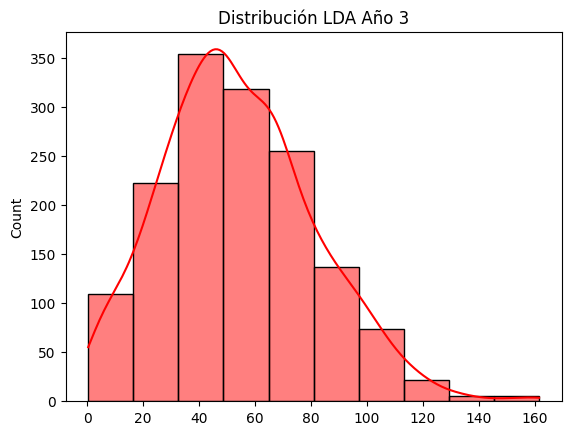

,LI,LS,ND,Columnas
0,0.427835,16.545128,8.486481,109.0
1,16.545128,32.662422,24.603775,222.0
2,32.662422,48.779716,40.721069,354.0
3,48.779716,64.897009,56.838362,318.0
4,64.897009,81.014303,72.955656,255.0
5,81.014303,97.131597,89.072950,137.0
6,97.131597,113.248890,105.190244,74.0
7,113.248890,129.366184,121.307537,22.0
8,129.366184,145.483478,137.424831,5.0
9,145.483478,161.600771,153.542125,5.0


In [ ]:
plt.figure()
sns.histplot(LDA3,kde=True,bins=NC3,color='red')
plt.title('Distribución LDA Año 3')
plt.show()

#Obtenemos la información de la Distribución
counts3, bin_edges3=np.histogram(LDA3,bins=NC3)
LI3=bin_edges3[:-1];LS3=bin_edges3[1:]
mc3=(LI3+LS3)/2 #El valor representativo de cada intervalo

#se crea la tabla de caracterización
TAsq3=np.column_stack((LI3,LS3,mc3,counts3))
df3=pd.DataFrame(TAsq3,columns=['LI','LS','ND','Columnas']) #ND= Número de datos
display(df3)

In [ ]:
u3=np.sum(mc3*counts3)/np.sum(counts3) #valor esperado
print("La media de los datos para el Año 3 es:",u3)

La media de los datos para el Año 3 es: 54.35795284724899


In [ ]:
varianza3=np.sum(counts3*(mc3-u3)**2)/np.sum(counts3)
print("La varianza de los datos para el Año 3 es:",varianza3) #Si tengo más intervalos es más preciso!

La varianza de los datos para el Año 3 es: 746.4973760157775


In [ ]:
desviacion3=np.sqrt(varianza3)
print("La desviación de los datos para el Año 3 es:",desviacion3)

La desviación de los datos para el Año 3 es: 27.32210416523181


In [ ]:
#Quiero identificar datos raros o outliers para el Año 3
LIe3=u3-2*desviacion3;LSe3=u3+2*desviacion3
filas_out3=np.where((LDA3<LIe3) | (LDA3>LSe3))[0]
LDA3.iloc[filas_out3,]

,0
18,117.916622
52,131.328924
58,110.453102
63,110.797410
100,112.691323
104,118.149660
122,148.757219
170,128.702155
207,111.937484
237,133.672974


In [ ]:
from scipy.stats import skew, kurtosis
print("El coeficiente de Asimetría colab para el Año 3 es", skew(LDA3))
print("El coeficiente de Curtosis colab para el Año 3 es", kurtosis(LDA3))

El coeficiente de Asimetría colab para el Año 3 es 0.46219026649218486
El coeficiente de Curtosis colab para el Año 3 es 0.18859622645960705


In [ ]:
#Coeficiente de Asimetría para el Año 3
cas3=np.sum(counts3*(mc3-u3)**3)/(np.sum(counts3)*desviacion3**3)
print("El coeficiente de asimetría para el Año 3 es:",cas3)
vcas3=(skew(LDA3)-cas3)/skew(LDA3)
print("La variación del coeficiente de asimetría para el Año 3 es:",vcas3*100)

El coeficiente de asimetría para el Año 3 es: 0.46305726633508854
La variación del coeficiente de asimetría para el Año 3 es: -0.18758505008852902


In [ ]:
#Coeficiente de Curtosis para el Año 3
curt3 = np.sum(counts3*(mc3-u3)**4)/(np.sum(counts3)*desviacion3**4)-3
print ("El coeficiente de curtosis para el Año 3 es:",curt3)

El coeficiente de curtosis para el Año 3 es: 0.05620072169277224


In [ ]:
PE3 = len(np.where(LDA3<u3)[0])
print("Las pérdidas esperadas para el Año 3 son:", PE3)
OpVar3 = np.percentile(LDA3, 99.9)
print("El costo de aseguramiento de cada crédito para el Año 3 es", OpVar3)
PC3 = len(np.where(LDA3>OpVar3)[0])
print("Las pérdidas catastróficas para el Año 3 son:", PC3)
PNE3 = len(np.where((LDA3>=u3)&(LDA3<=OpVar3))[0])
print("Las pérdidas no esperadas para el Año 3 son:", PNE3)

Las pérdidas esperadas para el Año 3 son: 809
El costo de aseguramiento de cada crédito para el Año 3 es 160.70668633158058
Las pérdidas catastróficas para el Año 3 son: 2
Las pérdidas no esperadas para el Año 3 son: 690


#Análisis
Del código anterior se puede observar que la libreria google.colab nos permite subir los datos automaticamente de acuerdo con la base de datos, se puede observar un total de 1342 datos. De las medidas de tendencia central se observa que la media de las pérdidas se ubicó 54.357 dolares por crédito, mientras que la desviación de los datos se ubicó en promedio de los 27 dolares. Es importante mencionar que el coeficiente de asimetría se ubicó por encima de cero, lo que indica que la distribución tiende a ser de cola larga, con una curtosis positiva, lo que indica que los datos se concentran en valores bajos o medios, con algunos valores altos que generan la cola derecha, y existe una ligera tendencia a tener outliers.

#Año 4

In [ ]:
nxl='/content/drive/MyDrive/Integración de Datos/1. SolicitantesCrédito(USD)_Años.xlsx'
XDB4=pd.read_excel(nxl,sheet_name=2)
display(XDB4)

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Nivel Renta,Estrato,Nivel de estudios,Tipo de contrato,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,0,3,Bachiller,Ninguno,...,48,18.375890,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1,0.041659,582.478943,0.168536
1,2,51,NR,Separado,6,1,1,4,Técnico,Ninguno,...,36,5.062492,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1,0.234951,479.839966,0.173085
2,3,37,Mujer,Casado,2,0,0,3,Tecnólogo,Indefinido,...,36,10.287688,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0,0.170330,417.653107,0.082779
3,4,29,NR,Separado,1,0,0,2,Tecnólogo,Ninguno,...,24,15.458878,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.201659,316.791107,0.463798
4,5,42,Mujer,Casado,3,4,4,2,Especializacion,Ninguno,...,24,24.995180,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.140929,441.809570,0.160611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2107,34,Hombre,Separado,0,1,1,2,Técnico,Ninguno,...,48,1.648938,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,0,0.318118,332.775055,0.358276
1496,2109,43,Mujer,Casado,6,0,0,3,Bachiller,Indefinido,...,36,1.617232,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,0,0.319108,386.770935,0.199316
1497,2110,29,Mujer,Casado,1,1,1,3,Ninguno,Indefinido,...,3,132.534580,Buena Experiencia CFB,Fondo de Garantia,Vehìculo sin Prenda,Con Experiencia sin Mora,0,0.149004,351.520782,0.124456
1498,2111,49,Mujer,Casado,1,0,0,5,Bachiller,Indefinido,...,24,43.986039,Buena Experiencia CFB,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1,0.086956,547.640869,0.112639


In [ ]:
#Se cálcula la distribución LDA
LDA4=XDB4.iloc[:,25]*XDB4.iloc[:,33]*(1+XDB4.iloc[:,35])
XDB4['LDA']=LDA4

In [ ]:
NC4=10 #número de clusters

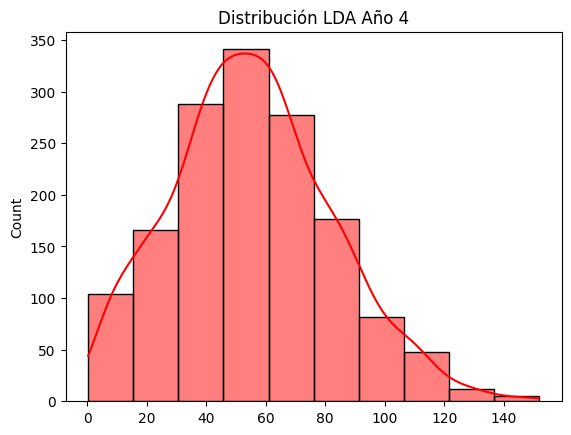

,LI,LS,ND,Columnas
0,0.354255,15.502616,7.928435,104.0
1,15.502616,30.650978,23.076797,166.0
2,30.650978,45.799339,38.225159,288.0
3,45.799339,60.947701,53.373520,341.0
4,60.947701,76.096063,68.521882,277.0
5,76.096063,91.244424,83.670243,177.0
6,91.244424,106.392786,98.818605,82.0
7,106.392786,121.541148,113.966967,48.0
8,121.541148,136.689509,129.115328,12.0
9,136.689509,151.837871,144.263690,5.0


In [ ]:
plt.figure()
sns.histplot(LDA4,kde=True,bins=NC4,color='red')
plt.title('Distribución LDA Año 4')
plt.show()

#Obtenemos la información de la Distribución
counts4, bin_edges4=np.histogram(LDA4,bins=NC4)
LI4=bin_edges4[:-1];LS4=bin_edges4[1:]
mc4=(LI4+LS4)/2 #El valor representativo de cada intervalo

#se crea la tabla de caracterización
TAsq4=np.column_stack((LI4,LS4,mc4,counts4))
df4=pd.DataFrame(TAsq4,columns=['LI','LS','ND','Columnas']) #ND= Número de datos
display(df4)

In [ ]:
u4=np.sum(mc4*counts4)/np.sum(counts4) #valor esperado
print("La media de los datos para el Año 4 es:",u4)

La media de los datos para el Año 4 es: 55.66597231387269


In [ ]:
varianza4=np.sum(counts4*(mc4-u4)**2)/np.sum(counts4)
print("La varianza de los datos para el Año 4 es:",varianza4) #Si tengo más intervalos es más preciso!

La varianza de los datos para el Año 4 es: 738.0837467102078


In [ ]:
desviacion4=np.sqrt(varianza4)
print("La desviación de los datos para el Año 4 es:",desviacion4)

La desviación de los datos para el Año 4 es: 27.167696750188593


In [ ]:
#Quiero identificar datos raros o outliers para el Año 4
LIe4=u4-2*desviacion4;LSe4=u4+2*desviacion4
filas_out4=np.where((LDA4<LIe4) | (LDA4>LSe4))[0]
LDA4.iloc[filas_out4,]

,0
25,116.300423
32,120.599257
52,128.605881
71,130.455571
114,110.963974
155,145.357400
259,113.894029
294,111.101482
335,111.316669
342,141.082219


In [ ]:
from scipy.stats import skew, kurtosis
print("El coeficiente de Asimetría colab para el Año 4 es", skew(LDA4))
print("El coeficiente de Curtosis colab para el Año 4 es", kurtosis(LDA4))

El coeficiente de Asimetría colab para el Año 4 es 0.3354409078926966
El coeficiente de Curtosis colab para el Año 4 es -0.06285449119370945


In [ ]:
#Coeficiente de Asimetría para el Año 4
cas4=np.sum(counts4*(mc4-u4)**3)/(np.sum(counts4)*desviacion4**3)
print("El coeficiente de asimetría para el Año 4 es:",cas4)
vcas4=(skew(LDA4)-cas4)/skew(LDA4)
print("La variación del coeficiente de asimetría para el Año 4 es:",vcas4*100)

El coeficiente de asimetría para el Año 4 es: 0.33970946303261645
La variación del coeficiente de asimetría para el Año 4 es: -1.2725207449311218


In [ ]:
#Coeficiente de Curtosis para el Año 4
curt4 = np.sum(counts4*(mc4-u4)**4)/(np.sum(counts4)*desviacion4**4)-3
print ("El coeficiente de curtosis para el Año 4 es:",curt4)

El coeficiente de curtosis para el Año 4 es: -0.1037825028068542


In [ ]:
PE4 = len(np.where(LDA4<u4)[0])
print("Las pérdidas esperadas para el Año 4 son:", PE4)
OpVar4 = np.percentile(LDA4, 99.9)
print("El costo de aseguramiento de cada crédito para el Año 4 es", OpVar4)
PC4 = len(np.where(LDA4>OpVar4)[0])
print("Las pérdidas catastróficas para el Año 4 son:", PC4)
PNE4 = len(np.where((LDA4>=u4)&(LDA4<=OpVar4))[0])
print("Las pérdidas no esperadas para el Año 4 son:", PNE4)

Las pérdidas esperadas para el Año 4 son: 781
El costo de aseguramiento de cada crédito para el Año 4 es 147.29776773898615
Las pérdidas catastróficas para el Año 4 son: 2
Las pérdidas no esperadas para el Año 4 son: 717


#Análisis
Del código anterior se puede observar que la libreria google.colab nos permite subir los datos automaticamente de acuerdo con la base de datos, se puede observar un total de 1500 datos. De las medidas de tendencia central se observa que la media de las pérdidas se ubicó 55.665 dolares por crédito, mientras que la desviación de los datos se ubicó en promedio de los 27 dolares. Es importante mencionar que el coeficiente de asimetría se ubicó levemente por encima de cero, lo que indica que la distribución tiende a ser de cola larga, con una curtosis negativa, lo que indica la gran dispersión de los datos.

In [ ]:
# Resumén de Datos
summary_data = {
    'Año': [1, 2, 3, 4],
    'Mean': [u, u2, u3, u4],
    'Varianza': [varianzaa, varianza2, varianza3, varianza4],
    'Desviación Estandar': [desviaciona, desviacion2, desviacion3, desviacion4],
    'Skewness (Colab)': [skew(LDAa), skew(LDA2), skew(LDA3), skew(LDA4)],
    'Kurtosis (Colab)': [kurtosis(LDAa), kurtosis(LDA2), kurtosis(LDA3), kurtosis(LDA4)],
    'Skewness (Manual)': [cas, cas2, cas3, cas4],
    'Kurtosis (Manual)': [curt, curt2, curt3, curt4],
    'Pérdidas Esperadas': [PE, PE2, PE3, PE4],
    'Costo de Aseguramiento (OpVar)': [OpVar, OpVar2, OpVar3, OpVar4],
    'Pérdidas Catastróficas (PC)': [PC, PC2, PC3, PC4],
    'Pérdidas no esperadas (PNE)': [PNE, PNE2, PNE3, PNE4]
}

# Create a pandas DataFrame from the dictionary
summary_df = pd.DataFrame(summary_data)

# Display the summary table
display(summary_df)

,Año,Mean,Varianza,Desviación Estandar,Skewness (Colab),Kurtosis (Colab),Skewness (Manual),Kurtosis (Manual),Pérdidas Esperadas,Costo de Aseguramiento (OpVar),Pérdidas Catastróficas (PC),Pérdidas no esperadas (PNE)
0,1,55.918002,836.110413,28.915574,0.607448,0.693889,0.593690,0.490726,729,161.291300,2,611
1,2,56.360670,794.299449,28.183319,0.565422,0.374982,0.539836,0.259159,813,149.709319,2,685
2,3,54.357953,746.497376,27.322104,0.462190,0.188596,0.463057,0.056201,809,160.706686,2,690
3,4,55.665972,738.083747,27.167697,0.335441,-0.062854,0.339709,-0.103783,781,147.297768,2,717


#Conclusión
Como podemos ver en esta tabla, datos muestran que las pérdidas presentan asimetría positiva, lo que indica que existen valores altos poco frecuentes que generan una cola hacia la derecha; sin embargo, tanto la asimetría como la curtosis disminuyen a lo largo de los años, pasando de una distribución más leptocúrtica en el primer año, con mayor concentración de datos y posibilidad de outliers, a una distribución casi simétrica y ligeramente platicúrtica en el cuarto año, reflejando mayor estabilidad. Las pérdidas esperadas se mantienen relativamente estables, mientras que las pérdidas no esperadas aumentan, lo que sugiere que aunque los eventos extremos siguen siendo poco frecuentes, su impacto potencial es cada vez mayor. Por otro lado, el costo de aseguramiento disminuye con el tiempo, lo que indica una percepción de menor riesgo agregado pese al aumento de las pérdidas extraordinarias.